In [1]:
import pandas as pd
import os
import numpy as np

C:\Users\voqua\AppData\Local\Temp\ipykernel_9524\3363072451.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_file = "clientTrajectory_JailUpdate.csv"
dataset_folder = "dataset"
csv_file_path = os.path.join(dataset_folder, data_file)

In [3]:
my_csv = pd.read_csv(csv_file_path)

## Exploration of the dataset

In [4]:
my_csv

,ProfileID,age,num_previous_recidivisms,race_Caucasian,race_Hispanic,race_Other,gender_Male,registeredSexOffender_TRUE,violentOffender_TRUE,gangMember_x_TRUE,...,ArrivalTime,WorkReleaseArrival,WorkReleaseDeparture,MonitoringArrival,MonitoringDeparture,HomeArrival,HomeDeparture,JailArrival,JailDeparture,Recidivism
0,0,42,0,1,0,0,1,0,0,0,...,0.007881,0.007881,0.236211,0.236211,5.467985,5.467985,19.350904,19.350904,22.350904,0
1,1,37,0,1,0,0,0,0,0,0,...,0.017360,0.017360,2.769589,NaN,NaN,2.769589,5.765856,5.765856,6.765856,0
2,2,62,0,0,1,0,1,0,0,0,...,0.033447,0.033447,1.721611,1.721611,3.700107,3.700107,11.915925,11.915925,16.915925,0
3,3,42,0,1,0,0,1,0,0,0,...,0.035496,0.035496,8.052818,8.052818,10.271917,10.271917,31.962209,31.962209,34.962209,0
4,4,43,0,1,0,0,1,0,0,0,...,0.036166,0.036166,0.280887,NaN,NaN,0.280887,2.425421,2.425421,10.425421,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50954,50954,53,0,1,0,0,0,0,0,0,...,899.876265,899.876265,899.964084,NaN,NaN,NaN,NaN,0.000000,3.000000,0
50955,50955,41,0,0,0,0,0,0,0,0,...,899.891829,899.891829,902.344845,NaN,NaN,NaN,NaN,0.000000,8.000000,0
50956,50956,29,0,1,0,0,0,0,0,0,...,899.907021,899.907021,905.382880,NaN,NaN,NaN,NaN,0.000000,4.000000,0
50957,50957,23,0,0,0,1,1,0,0,0,...,899.911229,899.911229,902.613586,NaN,NaN,NaN,NaN,0.000000,9.000000,0


In [5]:
my_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50959 entries, 0 to 50958
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ProfileID                                  50959 non-null  int64  
 1   age                                        50959 non-null  int64  
 2   num_previous_recidivisms                   50959 non-null  int64  
 3   race_Caucasian                             50959 non-null  int64  
 4   race_Hispanic                              50959 non-null  int64  
 5   race_Other                                 50959 non-null  int64  
 6   gender_Male                                50959 non-null  int64  
 7   registeredSexOffender_TRUE                 50959 non-null  int64  
 8   violentOffender_TRUE                       50959 non-null  int64  
 9   gangMember_x_TRUE                          50959 non-null  int64  
 10  homeless_TRUE         

In [6]:
my_csv['Recidivism'].unique()

array([0, 1], dtype=int64)

In [7]:
a = my_csv['num_previous_recidivisms'].unique()
a.sort()
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 31, 33], dtype=int64)

In [8]:
print(len(my_csv[ my_csv['Recidivism'] == 1]))
print(len(my_csv[ my_csv['Recidivism'] == 0]))
#because there are more "0" than 1, there could be a bias with True Negatives 
#=> consider change from False Postive Rate to Precision (FPR = FP/ FP + TN, and the result is skewed when TN is too big)

10601
40358


In [9]:
my_csv[ my_csv["MonitoringDeparture"] == np.nan]

,ProfileID,age,num_previous_recidivisms,race_Caucasian,race_Hispanic,race_Other,gender_Male,registeredSexOffender_TRUE,violentOffender_TRUE,gangMember_x_TRUE,...,ArrivalTime,WorkReleaseArrival,WorkReleaseDeparture,MonitoringArrival,MonitoringDeparture,HomeArrival,HomeDeparture,JailArrival,JailDeparture,Recidivism


## Model Training

In [10]:
import numpy as np
import math

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
myDF2 = my_csv.drop(['WorkReleaseArrival', 'WorkReleaseDeparture','MonitoringArrival',
                    'MonitoringDeparture','HomeArrival', 'HomeDeparture', 'ArrivalTime',
                    'JailDeparture','JailArrival', 'ProfileID','DNACollected_TRUE'], axis = 1)

In [13]:
y2 = myDF2['Recidivism']
X2 = myDF2.drop(['Recidivism'], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X2, y2, train_size = 0.7, random_state = 50)

Halving Grid Search

In [15]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [16]:
param_grid = {'max_depth': [ 5, 10, 15, 20, 22], 'min_samples_split': [ 10, 15, 20, 25, 30], 
              'bootstrap': [True,False], 
              'min_samples_leaf': [4,6,8,10] }

In [17]:
rf1 = RandomForestClassifier(random_state = 50)

In [18]:
#sh = HalvingGridSearchCV(rf, param_grid, cv=5).fit(X2,y2)
sh = HalvingGridSearchCV(rf1, param_grid , cv=5, factor=2, min_resources=100, scoring='roc_auc').fit(X2,y2)
#sh = HalvingGridSearchCV(rf, param_grid, cv=5, factor=3, resource="n_estimators", max_resources=30).fit(X2,y2)

In [177]:
sh.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 30}

In [ ]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=30, n_estimators=1500, bootstrap=False, criterion = 'gini',
                            min_samples_leaf=6, max_features='sqrt', random_state = 50)
rf.fit(X_train, y_train)

In [87]:
sh.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=30,
                       n_estimators=24, random_state=50)

In [71]:
sh.best_score_

0.7456857556460679

In [174]:
sh.n_resources_  #[1887, 5661, 16983, 50949] for base combination
# [100, 200, 400, 800, 1600] 2nd combination 
# [1, 3, 9, 27] 3rd case

[100, 200, 400, 800, 1600]

In [175]:
sh.max_resources_

50959

In [176]:
sh.n_candidates_ # [30, 10, 4, 2] base case
# [30, 15, 8, 4, 2] 2nd case
# [30, 10, 4, 2] 3rd case

[30, 15, 8, 4, 2]

In [178]:
sh.cv_results_

{'iter': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4]),
 'n_resources': array([ 100,  100,  100,  100,  100,  100,  100,  100,  100,  100,  100,
         100,  100,  100,  100,  100,  100,  100,  100,  100,  100,  100,
         100,  100,  100,  100,  100,  100,  100,  100,  200,  200,  200,
         200,  200,  200,  200,  200,  200,  200,  200,  200,  200,  200,
         200,  400,  400,  400,  400,  400,  400,  400,  400,  800,  800,
         800,  800, 1600, 1600]),
 'mean_fit_time': array([0.01944718, 0.01978912, 0.01938882, 0.01905007, 0.01943879,
        0.0197495 , 0.01945677, 0.01962981, 0.01950984, 0.01995645,
        0.02096295, 0.02053957, 0.01834826, 0.01862655, 0.01861339,
        0.01836634, 0.01892772, 0.01857629, 0.01890244, 0.01852679,
        0.01841931, 0.01845579, 0.01845636, 0.01893625, 0.01838217,
        0.018

In [90]:
y_pred = rf.predict(X_test)

In [92]:
1- sum(abs(y_pred - y_test))/(len(y_pred)) # percentage of correct/ similar answers

0.8062532705389849

AUC_ROC

In [23]:
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

In [223]:
y_pred_probs = rf.predict_proba(X_test)[:,1]
y_pred_probs

array([0.16017383, 0.24026012, 0.03417853, ..., 0.30850473, 0.14700378,
       0.23343949])

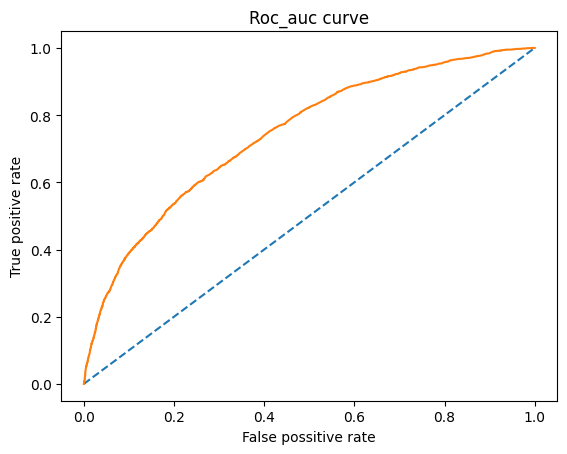

In [224]:
fpr, tpr , thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel('False possitive rate')
plt.ylabel('True positive rate')
plt.title('Roc_auc curve')
plt.show()

In [81]:
thresholds

array([       inf, 0.8253612 , 0.78253569, ..., 0.02888031, 0.02859804,
       0.02771607])

In [226]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_probs)

0.743939050235494

In [143]:
for name, score in zip(myDF2.columns, rf.feature_importances_):
    print (name, score*100)

age 7.349345495465509
num_previous_recidivisms 36.03710986963296
race_Caucasian 3.551579090607299
race_Hispanic 0.9270973918126688
race_Other 0.7011160119113552
gender_Male 8.061383863646752
registeredSexOffender_TRUE 0.47500622104198076
violentOffender_TRUE 1.1276683930989084
gangMember_x_TRUE 0.2865588343791716
homeless_TRUE 0.3117757979171571
employmentStatus_Full_Time 11.897792916783258
employmentStatus_Part_Time 1.0508447089648685
employmentStatus_Unemployed 3.885221094797868
HighestEducationLevel_High_School_Diploma 1.918187584644467
HighestEducationLevel_No_HS_Diploma 1.184271803960901
HighestEducationLevel_Some_College 1.0057555244189922
licenseStatus_Not_Suspended 8.932130975223288
licenseStatus_Suspended 11.29715442169259


Precision-Recall curve

In [214]:
from sklearn.metrics import PrecisionRecallDisplay

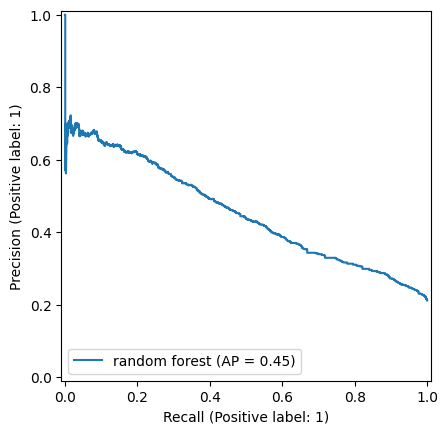

In [215]:
display = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, name ='random forest')


In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv = 5)

In [108]:
scores

array([-0.79140502, -0.26206829, -0.22223312, -0.24107143, -0.20832107])

In [110]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([0.88960948, 0.51192606, 0.47141608, 0.49099025, 0.45642203])